In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# 堆  heap
python官方文档：

https://docs.python.org/zh-cn/3.9/library/heapq.html?highlight=heap#module-heapq

其他文档

https://leetcode.cn/leetbook/read/heap/enepkr/

# 堆的定义与分类
## 堆的定义
根据 维基百科 的定义，堆 是一种特别的二叉树，满足以下条件的二叉树，可以称之为 堆：

1. 完全二叉树；
> 完全二叉树：从上到下，从左到右依次是填满的；对于最后面的节点如果不够，是可以空着的
2. 每一个节点的值都必须 大于等于或者小于等于 其孩子节点的值。

堆 具有以下的特点：

1. 可以在 O(logN) 的时间复杂度内向 堆 中插入元素；
2. 可以在 O(logN) 的时间复杂度内向 堆 中删除元素；
3. 可以在 O(1) 的时间复杂度内获取 堆 中的最大值或最小值。

## 堆的分类

堆 有两种类型：最大堆 和 最小堆。

最大堆：堆中每一个节点的值 都大于等于 其孩子节点的值。所以最大堆的特性是 堆顶元素（根节点）是堆中的最大值。

最小堆：堆中每一个节点的值 都小于等于 其孩子节点的值。所以最小堆的特性是 堆顶元素（根节点）是堆中的最小值。

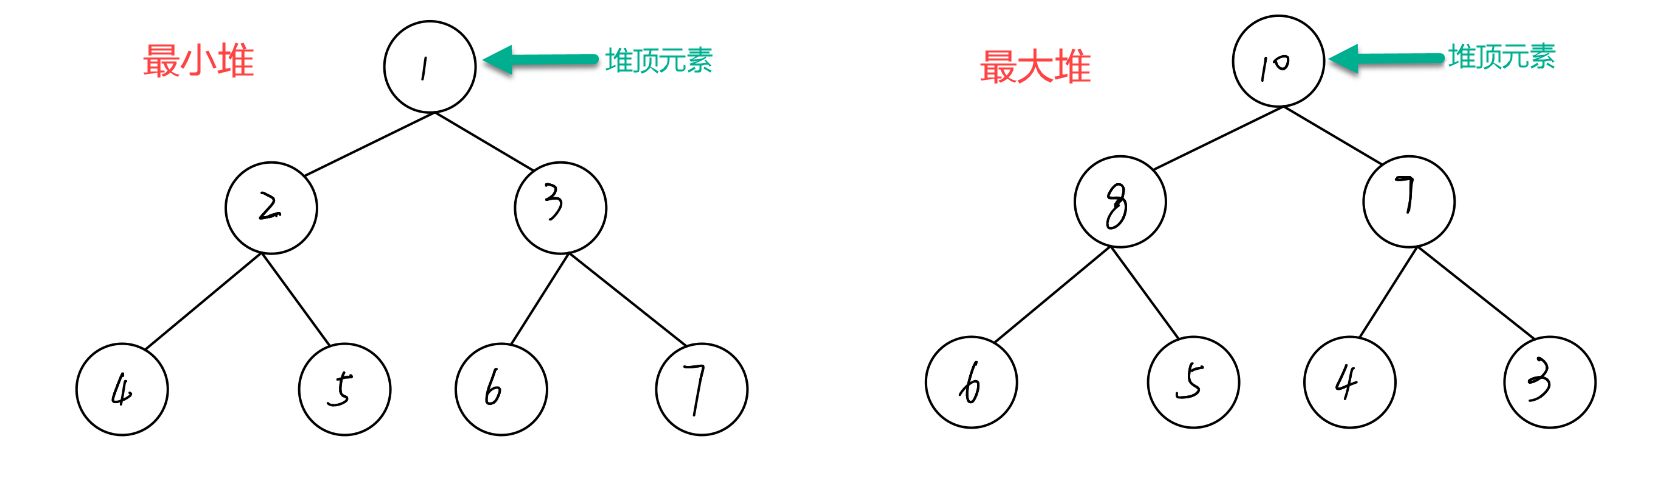

# 1. PriorityQueue和 heap的关系
PriorityQueue和heap都是Python中用于实现优先级队列的工具，但它们之间有一些区别。

PriorityQueue是 Python标准库中的一个类 ，它实现了一个基于堆的优先级队列。
- PriorityQueue类提供了一些方便的方法来添加和删除元素，并且可以自动维护元素的优先级顺序。
- PriorityQueue类还支持阻塞操作，这意味着如果队列为空，它将等待直到有元素可用。

heapq是 Python标准库中的一个 模块 ，它提供了一组函数来实现堆操作。
- heapq模块中的函数可以用于实现自定义优先级队列，并且可以在列表中直接操作元素。
- heapq模块不提供阻塞操作，因此如果堆为空，它将引发一个异常。

1. 可以使用heapq模块来实现PriorityQueue类，但是PriorityQueue类提供了更高级别的抽象，因此通常更容易使用。
2. 如果您需要更多的灵活性，或者需要实现自定义的优先级队列逻辑，那么heapq模块可能更适合您的需求。

PriorityQueue的实现就是调用heap模块，只是基于Queue类进行了封装，加入了同步机制。

In [2]:
# PriorityQueue的实现就是调用heap模块，只是基于Queue类进行了封装，加入了同步机制。
import queue
 # 创建一个PriorityQueue对象
q = queue.PriorityQueue()
 # 使用put()方法将元组（优先级，数据）添加到队列中
q.put((2, 'data1'))
q.put((1, 'data2'))
q.put((3, 'data3'))
 # get()方法从队列中取出元素： PriorityQueue是基于堆实现的，因此元素的顺序是根据其优先级确定的。
item = q.get()  # (1, 'data2')
print(item)
 # 检查队列是否为空
if q.empty():
    print("队列为空")
else:
    print("队列不为空")
 # 获取队列中的元素个数
size = q.qsize()  # 2
print("队列中有{}个元素".format(size))

(1, 'data2')
队列不为空
队列中有2个元素


# 2.heapq --- python堆队列算法
堆是一个二叉树，它的每个父节点的值都只会小于或等于所有孩子节点（的值）。

它使用了数组来实现：从零开始计数，对于所有的 k ，都有 heap[k] <= heap[2*k+1] 和 heap[k] <= heap[2*k+2]。

为了便于比较，不存在的元素被认为是无限大。 堆最有趣的特性在于最小的元素总是在根结点：heap[0]。

这个API与教材的堆算法实现有所不同，具体区别有两方面：
1. （a）我们使用了从零开始的索引。这使得节点和其孩子节点索引之间的关系不太直观但更加适合，因为 Python 使用从零开始的索引。
2. （b）我们的 pop 方法返回最小的项而不是最大的项（这在教材中称为“最小堆”；而“最大堆”在教材中更为常见，因为它更适用于原地排序）。

基于这两方面，把堆看作原生的Python list也没什么奇怪的： heap[0] 表示最小的元素，同时 heap.sort() 维护了堆的不变性！

要创建一个堆，可以使用list来初始化为 [] ，或者你可以通过一个函数 heapify() ，来把一个list转换成堆。

In [ ]:
# 源码学习
__all__ = ['heappush', 'heappop', 'heapify', '_siftup', '_siftdown', 'heapreplace', 'nlargest', 'nsmallest']
def heappush(heap, item):
    """Push item onto heap, maintaining the heap invariant."""
    heap.append(item)
    _siftdown(heap, 0, len(heap)-1)

def heappop(heap):
    """Pop the smallest item off the heap, maintaining the heap invariant."""
    lastelt = heap.pop()    # raises appropriate IndexError if heap is empty
    if heap:
        returnitem = heap[0]
        heap[0] = lastelt
        _siftup(heap, 0)
        return returnitem
    return lastelt

def heapify(x):
    """Transform list into a heap, in-place, in O(len(x)) time."""
    n = len(x)
    # Transform bottom-up.  The largest index there's any point to looking at
    # is the largest with a child index in-range, so must have 2*i + 1 < n,
    # or i < (n-1)/2.  If n is even = 2*j, this is (2*j-1)/2 = j-1/2 so
    # j-1 is the largest, which is n//2 - 1.  If n is odd = 2*j+1, this is
    # (2*j+1-1)/2 = j so j-1 is the largest, and that's again n//2-1.
    for i in reversed(range(n//2)):
        _siftup(x, i)

# 'heap' is a heap at all indices >= startpos, except possibly for pos.  pos
# is the index of a leaf with a possibly out-of-order value.  Restore the
# heap invariant.
def _siftdown(heap, startpos, pos):
    newitem = heap[pos]
    # Follow the path to the root, moving parents down until finding a place
    # newitem fits.
    while pos > startpos:
        parentpos = (pos - 1) >> 1
        parent = heap[parentpos]
        if newitem < parent:
            heap[pos] = parent
            pos = parentpos
            continue
        break
    heap[pos] = newitem

def _siftup(heap, pos):
    endpos = len(heap)
    startpos = pos
    newitem = heap[pos]
    # Bubble up the smaller child until hitting a leaf.
    childpos = 2*pos + 1    # leftmost child position
    while childpos < endpos:
        # Set childpos to index of smaller child.
        rightpos = childpos + 1
        if rightpos < endpos and not heap[childpos] < heap[rightpos]:
            childpos = rightpos
        # Move the smaller child up.
        heap[pos] = heap[childpos]
        pos = childpos
        childpos = 2*pos + 1
    # The leaf at pos is empty now.  Put newitem there, and bubble it up
    # to its final resting place (by sifting its parents down).
    heap[pos] = newitem
    _siftdown(heap, startpos, pos)

def heapreplace(heap, item):
    """Pop and return the current smallest value, and add the new item.

    This is more efficient than heappop() followed by heappush(), and can be
    more appropriate when using a fixed-size heap.  Note that the value
    returned may be larger than item!  That constrains reasonable uses of
    this routine unless written as part of a conditional replacement:

        if item > heap[0]:
            item = heapreplace(heap, item)
    """
    returnitem = heap[0]    # raises appropriate IndexError if heap is empty
    heap[0] = item
    _siftup(heap, 0)
    return returnitem

In [1]:
# 注意：python3的heap只支持最小堆
import heapq
 # 创建一个空的堆
heap = []
 # 向堆中添加元素(优先级，数据)
heapq.heappush(heap, (5, 'data1'))
heapq.heappush(heap, (3, 'data2'))
heapq.heappush(heap, (4, 'data3'))
 # 从堆中弹出元素()
item = heapq.heappop(heap)
print(item)
 # 获取堆中最小的元素
item = heap[0]
print(item)

(3, 'data2')
(4, 'data3')


# heapify
1. heapify是Python中heapq模块中的一个函数，用于将一个列表转换为堆。
2. heapify函数将列表作为参数，并使用堆排序算法对其进行排序，以便可以使用堆中的其他操作（如heappush和heappop）对其进行操作。

3. heapify(x)           # transforms list into a heap, in-place, in linear time

In [3]:
import heapq
 # 创建一个列表
data = [5, 3, 1, 4, 6]
 # 将列表转换为堆
heapq.heapify(data)
 # 打印堆中的元素
print(data)  # [1, 3, 5, 4, 6]
 # 从堆中弹出元素
item = heapq.heappop(data)
print(item)  # 1
 # 向堆中添加元素
heapq.heappush(data, 2)
 # 打印堆中的元素
print(data)   # [2, 3, 5, 6, 4]

[1, 3, 5, 4, 6]
1
[2, 3, 5, 6, 4]


# merge(*iterables, key=None, reverse=False):

合并多个有序的迭代器或序列

    '''Merge multiple sorted inputs into a single sorted output.

    Similar to sorted(itertools.chain(*iterables)) but returns a generator,
    does not pull the data into memory all at once, and assumes that each of
    the input streams is already sorted (smallest to largest).

    >>> list(merge([1,3,5,7], [0,2,4,8], [5,10,15,20], [], [25]))
    [0, 1, 2, 3, 4, 5, 5, 7, 8, 10, 15, 20, 25]

    If *key* is not None, applies a key function to each element to determine
    its sort order.

    >>> list(merge(['dog', 'horse'], ['cat', 'fish', 'kangaroo'], key=len))
    ['dog', 'cat', 'fish', 'horse', 'kangaroo']

    '''

In [12]:
list(heapq.merge([1,3,5,7], [0,2,4,8], [5,10,15,20], [], [25]))
# [0, 1, 2, 3, 4, 5, 5, 7, 8, 10, 15, 20, 25]

# 按照元素长度排序
list(heapq.merge(['dog', 'horse'], ['cat', 'fish', 'kangaroo'], key=len))
# ['dog', 'cat', 'fish', 'horse', 'kangaroo']


# 使用  sorted  函数实现与  heapq.merge  函数相同的效果，可以将两个列表合并并按照指定的键
sorted(['dog', 'horse'] + ['cat', 'fish', 'kangaroo'], key=len)

[0, 1, 2, 3, 4, 5, 5, 7, 8, 10, 15, 20, 25]

['dog', 'cat', 'fish', 'horse', 'kangaroo']

[1, 1, 9, 3, 2, 9, 3, 2]

['dog', 'cat', 'fish', 'horse', 'kangaroo']

# 堆排序
1. 使用heapq.heapify()方法可以将列表nums原地转换为最小堆，
2. 然后使用列表推导式和heapq.heappop()方法依次弹出堆中的元素，最终得到排序后的结果。
3. 这个方法的时间复杂度为O(nlogn)，与原来的方法相同，但是代码更加简洁。

- 这类似于 sorted(iterable)，但与 sorted() 不同的是这个实现是不稳定的。
- 堆元素可以为元组。 这适用于将比较值（例如任务优先级）与跟踪的主记录进行赋值的场合:

In [9]:
import heapq
# 实现Python最小堆(非原地排序）

def heapSort(nums):
    heapq.heapify(nums)
    ans = []
    while nums:
        ans.append(heapq.heappop(nums))
    return ans

heapSort([1, 3, 5, 7, 9, 2, 4, 6, 8, 0])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# nsmallest(n, iterable, key=None)


In [12]:
import heapq
"""Find the n smallest elements in a dataset.

    Equivalent to:  sorted(iterable, key=key)[:n]
    """

# Short-cut for n==1 is to use min()
heapq.nsmallest(3, [4, 6, 7, 8, 1, 2, 3, 5]) # [1, 2, 3]
heapq.nsmallest(1, [4, 6, 7, 8, 1, 2, 3, 5]) # [1]
heapq.nlargest(3, [4, 6, 7, 8, 1, 2, 3, 5]) # [8, 7, 6]

h = []
heapq.heappush(h, (5, 'write code'))
heapq.heappush(h, (7, 'release product'))
heapq.heappush(h, (1, 'write spec'))
heapq.heappush(h, (3, 'create tests'))
heapq.heappop(h)

'Find the n smallest elements in a dataset.\n\n    Equivalent to:  sorted(iterable, key=key)[:n]\n    '

[1, 2, 3]

[1]

[8, 7, 6]

(1, 'write spec')

# 优先队列实现说明
优先队列 是堆的常用场合，并且它的实现包含了多个挑战：

## 排序稳定性：你该如何令相同优先级的两个任务按它们最初被加入时的顺序返回？

如果优先级相同且任务没有默认比较顺序，则 (priority, task) 对的元组比较将会中断。

## 如果任务优先级发生改变，你该如何将其移至堆中的新位置？

或者如果一个挂起的任务需要被删除，你该如何找到它并将其移出队列？

In [ ]:
import itertools

pq = []                         # list of entries arranged in a heap
entry_finder = {}               # mapping of tasks to entries
REMOVED = '<removed-task>'      # placeholder for a removed task
counter = itertools.count()     # unique sequence count

def add_task(task, priority=0):
    """Add a new task or update the priority of an existing task"""
    if task in entry_finder:
        remove_task(task)
    count = next(counter)
    entry = [priority, count, task]
    entry_finder[task] = entry
    heappush(pq, entry)

def remove_task(task):
    """Mark an existing task as REMOVED.  Raise KeyError if not found."""
    entry = entry_finder.pop(task)
    entry[-1] = REMOVED

def pop_task():
    """Remove and return the lowest priority task. Raise KeyError if empty."""
    while pq:
        priority, count, task = heappop(pq)
        if task is not REMOVED:
            del entry_finder[task]
            return task
    raise KeyError('pop from an empty priority queue')

In [14]:
dic = dict(zip([1,2,3], ['a','b','c']))
dic  # {'a': 1, 'b': 2, 'c': 3}
dic.pop(1)  # 'a'
dic[-1] = '<removed-task>'
dic

{1: 'a', 2: 'b', 3: 'c'}

'a'

{2: 'b', 3: 'c', -1: '<removed-task>'}

# 堆理论
堆是通过数组来实现的，其中的元素从 0 开始计数，对于所有的 k 都有 a[k] <= a[2*k+1] 且 a[k] <= a[2*k+2]。

为了便于比较，不存在的元素被视为无穷大。 堆最有趣的特性在于 a[0] 总是其中最小的元素。